# house price prediction

# 1. import library

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


# 2.load dataset

In [3]:
house_data = pd.read_csv('Housing.csv')

In [4]:
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# 3.last five rows of the dataset

In [5]:
house_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# 4.howmany rows and columns

In [6]:
house_data.shape

(545, 13)

# 5.datatypes

In [7]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# 6.statitical data

In [8]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# 7.check null values of the dataset

In [9]:
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# 8.drop columns

In [10]:
house_data   # no drops columns

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# 9. outlier removal

<Axes: ylabel='price'>

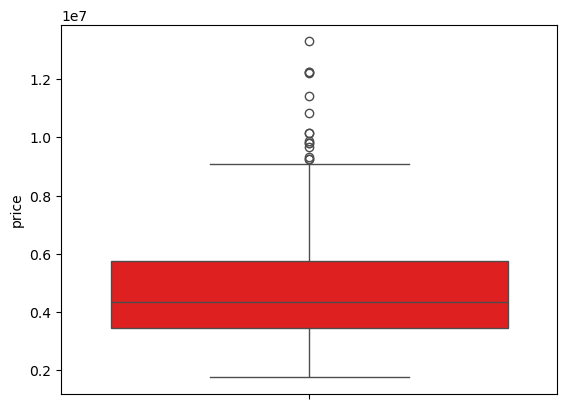

In [11]:
sns.boxplot(house_data['price'],color='red')

In [12]:
sorted(house_data['price'],reverse=True)

[13300000,
 12250000,
 12250000,
 12215000,
 11410000,
 10850000,
 10150000,
 10150000,
 9870000,
 9800000,
 9800000,
 9681000,
 9310000,
 9240000,
 9240000,
 9100000,
 9100000,
 8960000,
 8890000,
 8855000,
 8750000,
 8680000,
 8645000,
 8645000,
 8575000,
 8540000,
 8463000,
 8400000,
 8400000,
 8400000,
 8400000,
 8400000,
 8295000,
 8190000,
 8120000,
 8080940,
 8043000,
 7980000,
 7962500,
 7910000,
 7875000,
 7840000,
 7700000,
 7700000,
 7560000,
 7560000,
 7525000,
 7490000,
 7455000,
 7420000,
 7420000,
 7420000,
 7350000,
 7350000,
 7350000,
 7350000,
 7343000,
 7245000,
 7210000,
 7210000,
 7140000,
 7070000,
 7070000,
 7035000,
 7000000,
 6930000,
 6930000,
 6895000,
 6860000,
 6790000,
 6790000,
 6755000,
 6720000,
 6685000,
 6650000,
 6650000,
 6650000,
 6650000,
 6650000,
 6650000,
 6629000,
 6615000,
 6615000,
 6580000,
 6510000,
 6510000,
 6510000,
 6475000,
 6475000,
 6440000,
 6440000,
 6419000,
 6405000,
 6300000,
 6300000,
 6300000,
 6300000,
 6300000,
 6293000,
 6

In [13]:
house_data=house_data[-(house_data['price']>=10850000) & (house_data['price']<=13300000)]

In [14]:
house_data.shape

(539, 13)

# 10.Outlier removel check

In [15]:
sorted(house_data['price'],reverse=True)

[10150000,
 10150000,
 9870000,
 9800000,
 9800000,
 9681000,
 9310000,
 9240000,
 9240000,
 9100000,
 9100000,
 8960000,
 8890000,
 8855000,
 8750000,
 8680000,
 8645000,
 8645000,
 8575000,
 8540000,
 8463000,
 8400000,
 8400000,
 8400000,
 8400000,
 8400000,
 8295000,
 8190000,
 8120000,
 8080940,
 8043000,
 7980000,
 7962500,
 7910000,
 7875000,
 7840000,
 7700000,
 7700000,
 7560000,
 7560000,
 7525000,
 7490000,
 7455000,
 7420000,
 7420000,
 7420000,
 7350000,
 7350000,
 7350000,
 7350000,
 7343000,
 7245000,
 7210000,
 7210000,
 7140000,
 7070000,
 7070000,
 7035000,
 7000000,
 6930000,
 6930000,
 6895000,
 6860000,
 6790000,
 6790000,
 6755000,
 6720000,
 6685000,
 6650000,
 6650000,
 6650000,
 6650000,
 6650000,
 6650000,
 6629000,
 6615000,
 6615000,
 6580000,
 6510000,
 6510000,
 6510000,
 6475000,
 6475000,
 6440000,
 6440000,
 6419000,
 6405000,
 6300000,
 6300000,
 6300000,
 6300000,
 6300000,
 6293000,
 6265000,
 6230000,
 6230000,
 6195000,
 6195000,
 6195000,
 6160000

# 11.outlier check removal plot

<Axes: ylabel='price'>

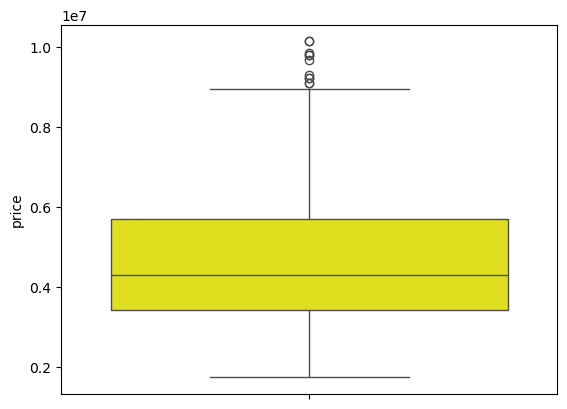

In [16]:
sns.boxplot(house_data['price'],color='yellow')

# 12.handling categorical column (onehot encoding)

In [17]:
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished


In [18]:
house_data['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [19]:
house_data['mainroad']=house_data['mainroad'].map({'no':0, 'yes':1})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\1705252073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['mainroad']=house_data['mainroad'].map({'no':0, 'yes':1})


In [20]:
house_data['mainroad'].unique()

array([1, 0])

In [21]:
house_data['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
house_data['guestroom'] = house_data['guestroom'].map({'no':0,'yes':1})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\2960594528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['guestroom'] = house_data['guestroom'].map({'no':0,'yes':1})


In [23]:
house_data['guestroom'].unique()

array([0, 1])

In [24]:
house_data['basement'].unique()

array(['no', 'yes'], dtype=object)

In [25]:
house_data['basement'] = house_data['basement'].map({'no':0,'yes':1})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\2839045775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['basement'] = house_data['basement'].map({'no':0,'yes':1})


In [26]:
house_data['basement'].unique()

array([0, 1])

In [27]:
house_data['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
house_data['hotwaterheating'] = house_data['hotwaterheating'].map({'no':0,'yes':1})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\3477659982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['hotwaterheating'] = house_data['hotwaterheating'].map({'no':0,'yes':1})


In [29]:
house_data['hotwaterheating'].unique()

array([0, 1])

In [30]:
house_data['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [31]:
house_data['airconditioning'] = house_data['airconditioning'].map({'yes':1,'no':0})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\2469096131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['airconditioning'] = house_data['airconditioning'].map({'yes':1,'no':0})


In [32]:
house_data['airconditioning'].unique()

array([1, 0])

In [33]:
house_data['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [34]:
house_data['prefarea']=house_data['prefarea'].map({'yes':1,'no':0})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\771721751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['prefarea']=house_data['prefarea'].map({'yes':1,'no':0})


In [35]:
house_data['prefarea'].unique()

array([1, 0])

In [36]:
house_data['furnishingstatus'].unique()

array(['semi-furnished', 'unfurnished', 'furnished'], dtype=object)

In [37]:
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({'semi-furnished':1,'unfurnished':0,'furnished':2})

C:\Users\HP\AppData\Local\Temp\ipykernel_16768\4102848422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_data['furnishingstatus'] = house_data['furnishingstatus'].map({'semi-furnished':1,'unfurnished':0,'furnished':2})


In [38]:
house_data['furnishingstatus'].unique()

array([1, 0, 2])

In [39]:
house_data.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2
544,1750000,3850,3,1,2,1,0,0,0,0,0,0,0


# 13. split features and target

In [40]:
X = house_data.drop(['price'],axis=1)
y = house_data['price']

In [41]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
6,8580,4,3,4,1,0,0,0,1,2,1,1
7,16200,5,3,2,1,0,0,0,0,0,0,0
8,8100,4,1,2,1,1,1,0,1,2,1,2
9,5750,3,2,4,1,1,0,0,1,1,1,0
10,13200,3,1,2,1,0,1,0,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [42]:
y

6      10150000
7      10150000
8       9870000
9       9800000
10      9800000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 539, dtype: int64

In [43]:
features = X.columns.to_list()

In [44]:
print(len(features))

12


# 14.training data and testing data

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# 15.model training

In [46]:

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [52]:
predictions1 = gb.predict(X_test)

In [54]:
mse = mean_squared_error(y_test,predictions1)

In [56]:
print(f" Gradient Boosting Regressor MSE: {mse:.2f}")

 Gradient Boosting Regressor MSE: 1157320601524.74


In [67]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [62]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
##########

RandomForestRegressor()

# 16.prediction on testdata

In [71]:
y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gb.predict(X_test)

# 17.Evaluate the algorithms

In [72]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)

In [73]:
print(score1,score2,score3)

0.7176205224793608 0.6667254072901965 0.6982024439838189


In [74]:
final_data = pd.DataFrame({'Models':['LR','RF','GB'],
                          "R2_SCORE":[score1,score2,score3]})

In [75]:
final_data

,Models,R2_SCORE
0,LR,0.717621
1,RF,0.666725
2,GB,0.698202


<Axes: xlabel='Models', ylabel='R2_SCORE'>

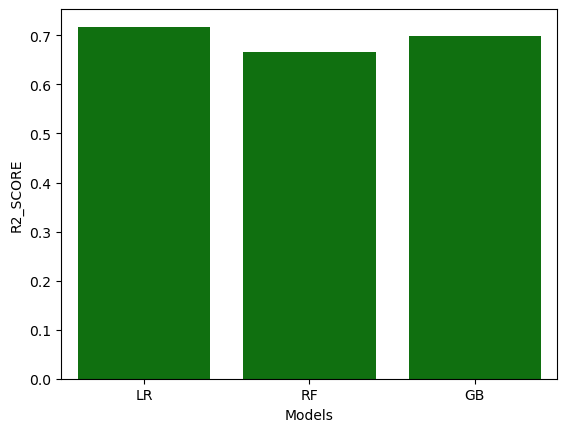

In [76]:
sns.barplot(x='Models', y='R2_SCORE',data=final_data,color='green')

# 18.save the model

In [77]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
import joblib

In [79]:
joblib.dump(lr,'house_price_predictor.pkl')

['house_price_predictor.pkl']

In [80]:
model = joblib.load('house_price_predictor.pkl')

In [81]:
joblib.dump(features,'features_joblib.pkl')

['features_joblib.pkl']

In [82]:
features1 = joblib.load('features_joblib.pkl')

# Prediction on new data

In [83]:
import pandas as pd
data_new = pd.DataFrame({
    'area':3850,
    'bedrooms': 3,
    'bathrooms':1,
    'stories':2,
    'mainroad':1,
    'guestroom':0,
    'basement':0,
    'hotwaterheating':0,
    'airconditioning':0,
    'parking':0,
    'prefarea':0,
    'furnishingstatus':0,
},index=[544])

In [84]:
lr.predict(data_new)

array([3404253.82657906])